# DV HW 2 

In [101]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from pylab import *
from mpl_toolkits.axes_grid.axislines import SubplotZero
import matplotlib.dates as mdates
import calendar
from mpl_toolkits.basemap import Basemap
import statsmodels.api as sm
import pylab as py
from matplotlib.ticker import MaxNLocator
import numpy as np


## Q1 Chapter 2 concepts using hotel_booking dataset

In [102]:
#Load the data
df = pd.read_csv("hotel_bookings.csv")
df.head()
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### There are 32 columns with 119390 rows

In [104]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

#### There are four columns with missing values - children,country,agent,company. 
#### Children, if missing may imply that no children were present so can be replaced with 0. 
#### Missing Country values can by replaced by unidentified. 
#### There are many rows  with missing agent ID it may be due to direct booking by customers.
#### Company ID through which the booking got placed has many missing values.This column may be removed or ignored from our analysis.


In [105]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [106]:
# remove duplicates and keep the first copy
df[df.duplicated(keep='first')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,7/7/2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,7/7/2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,7/1/2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,7/8/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,9/3/2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,9/3/2017


In [107]:
# drop company column
#df.drop(['company'],axis=1,inplace=True)

# Impute missing children value to 0
df = df.fillna({'children': 0,'country': 'unknown', 'agent': 'private', 'company': 'individual'})


In [108]:
# Some derived columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']


In [109]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [110]:
#df['total_price'] = df['total_nights'] * df['adr']

#df['price_per_guest'] = df['total_price']/df['total_guests']


In [111]:
df.describe(include=['object','float64','int64'])


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390.000000
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,353,NaN,4,NaN,NaN,NaN,3,926,NaN,NaN
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,individual,NaN,Transient,NaN,NaN,NaN,Check-Out,10/21/2015,NaN,NaN
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,112593,NaN,89613,NaN,NaN,NaN,75166,1461,NaN,NaN
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN,1.968239,3.427900
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN,0.722394,2.557439
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN,2.000000,2.000000
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN,2.000000,3.000000
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN,2.000000,4.000000


### As can be seen from the above description, even when there were no guests, there are some entries for prices.We will need to explore this.
### Possibly cases of cancellation


In [112]:
# Make a copy of dataframe with non cancelled entries
df1 = df.loc[df["is_canceled"] == 0].copy()


In [113]:
df1.describe(include=['object','float64','int64'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights
count,75166,75166.0,75166.000000,75166.000000,75166,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,...,75166,75166.000000,75166,75166.000000,75166.000000,75166.000000,75166,75166,75166.000000,75166.000000
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,332,NaN,4,NaN,NaN,NaN,1,805,NaN,NaN
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,individual,NaN,Transient,NaN,NaN,NaN,Check-Out,12/8/2015,NaN,NaN
freq,46228,NaN,NaN,NaN,8638,NaN,NaN,NaN,NaN,NaN,...,69560,NaN,53099,NaN,NaN,NaN,75166,243,NaN,NaN
mean,NaN,0.0,79.984687,2016.147514,NaN,27.080143,15.839529,0.928971,2.464053,1.829737,...,NaN,1.589868,NaN,99.987693,0.099300,0.714060,NaN,NaN,1.942461,3.393023
std,NaN,0.0,91.109888,0.703124,NaN,13.902478,8.776422,0.993371,1.924803,0.510451,...,NaN,14.784875,NaN,49.206263,0.303176,0.833887,NaN,NaN,0.669966,2.577671
min,NaN,0.0,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,NaN,0.0,9.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,0.000000,NaN,67.500000,0.000000,0.000000,NaN,NaN,2.000000,2.000000
50%,NaN,0.0,45.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,0.000000,NaN,92.500000,0.000000,1.000000,NaN,NaN,2.000000,3.000000
75%,NaN,0.0,124.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,0.000000,NaN,125.000000,0.000000,1.000000,NaN,NaN,2.000000,4.000000


CATEGORICAL COLUMNS' UNIQUE VALUES => 


hotel: 
['Resort Hotel' 'City Hotel']

********************************************************************************

is_canceled: 
[0 1]

********************************************************************************

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

********************************************************************************

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' '

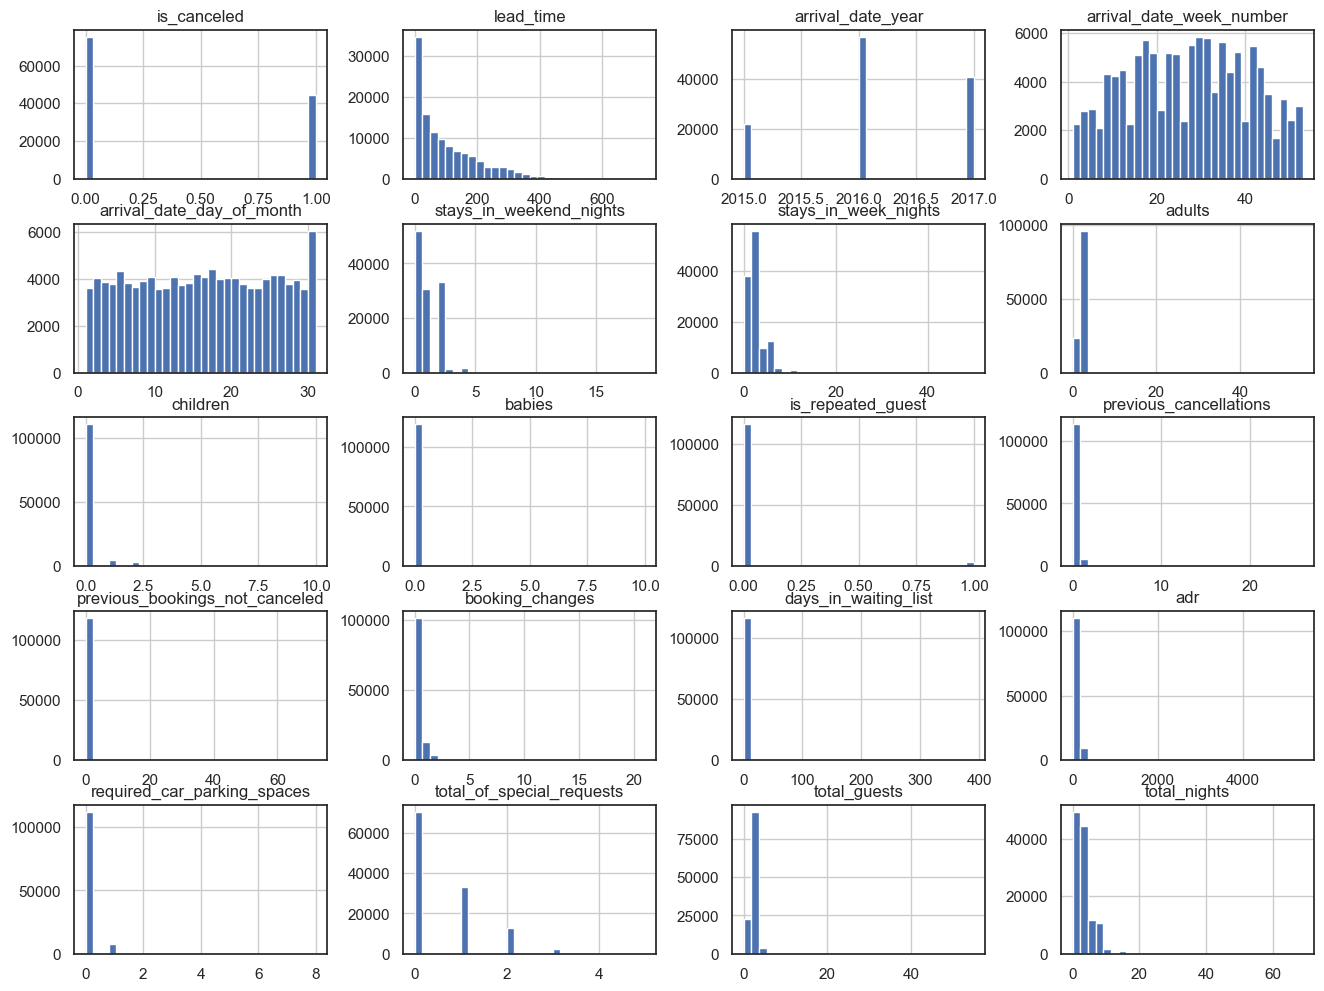

In [114]:
# Categorical columns
cat_cols = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

# Unique values in each categorical column
print(f"Categorical columns' Unique values => \n".upper())
for cat_col in cat_cols:
    unique_values = df[cat_col].unique()
    print(f"\n{cat_col}: \n{unique_values}\n")
    print('*' * 80)

# To check overall distribution
df.hist(bins= 30,figsize=(16,12));


<AxesSubplot:xlabel='arrival_date_day_of_month', ylabel='adr'>

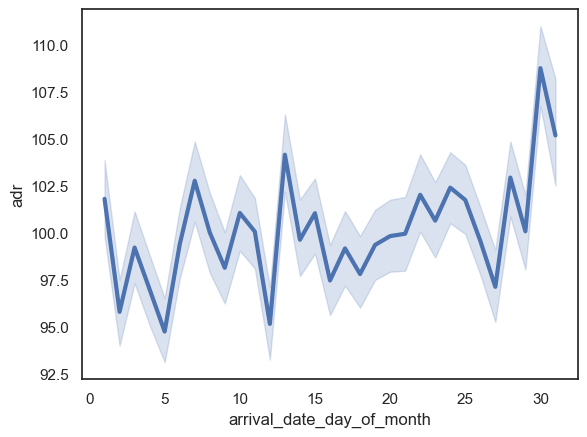

In [115]:
sn.lineplot(data=df1,x='arrival_date_day_of_month',y='adr')

In [116]:
### Plot shows average daily rate of the rooms generally increase at the later part of the month

<AxesSubplot:xlabel='arrival_date_year', ylabel='adr'>

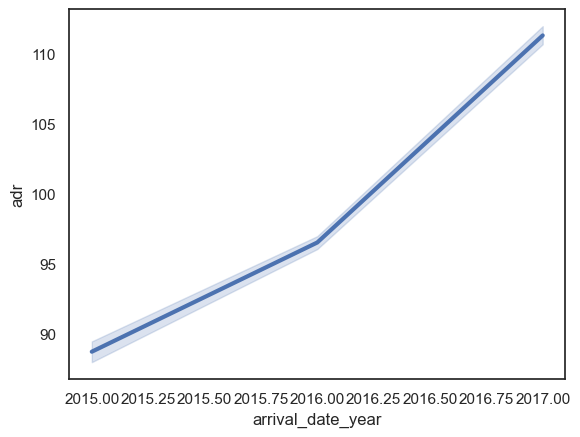

In [117]:
sn.lineplot(data=df1,x='arrival_date_year',y='adr')

In [118]:
### There has been significant increase in the average daily price from year 2015 50 yr 2017

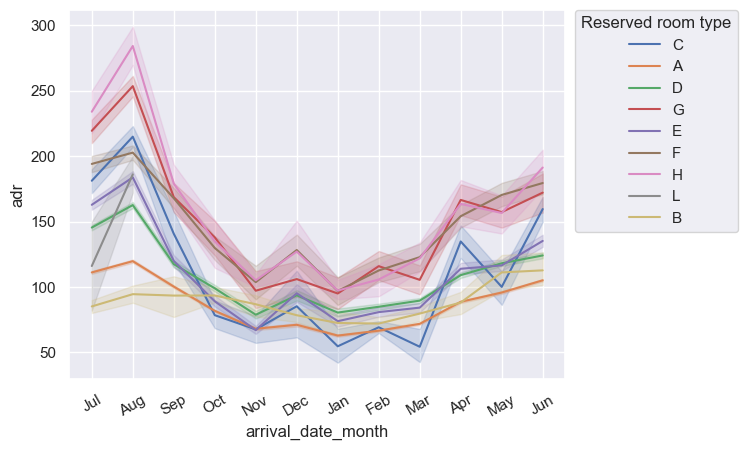

In [119]:
sn.set(style="darkgrid")
g = sn.lineplot(data=df1,x='arrival_date_month',y='adr', hue='reserved_room_type')
g.set_xticklabels(labels=['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'], rotation=30);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Reserved room type');


In [120]:
### The average daily rate of room types are higher in the months of July and August because of the school vacation and summer season during that time

<AxesSubplot:>

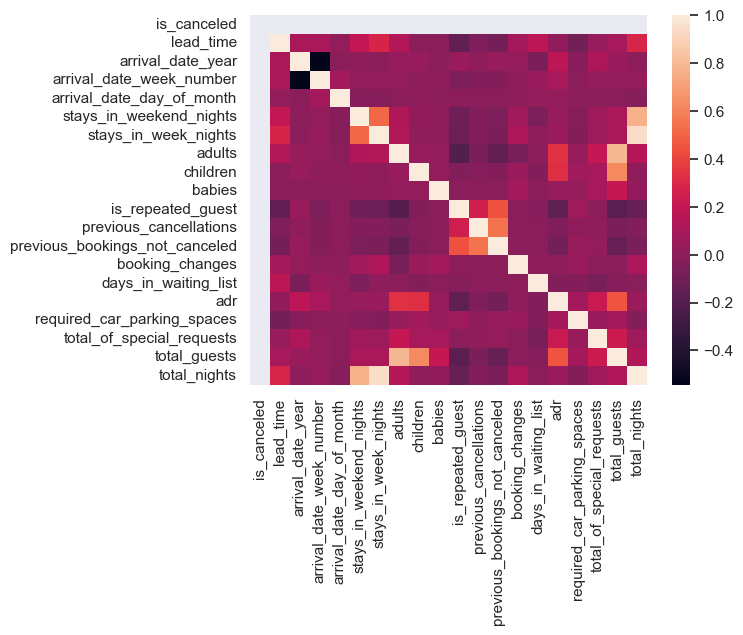

In [121]:
corr = df1.corr()
sn.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns)


In [122]:
# Datatype of reservation status type is an object.Converting it into Datetime 

df1['reservation_status_date'].dtype

df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

df1['reservation_status_date'].dtype

dtype('<M8[ns]')

In [123]:
### five scale representing different variables from dataset.

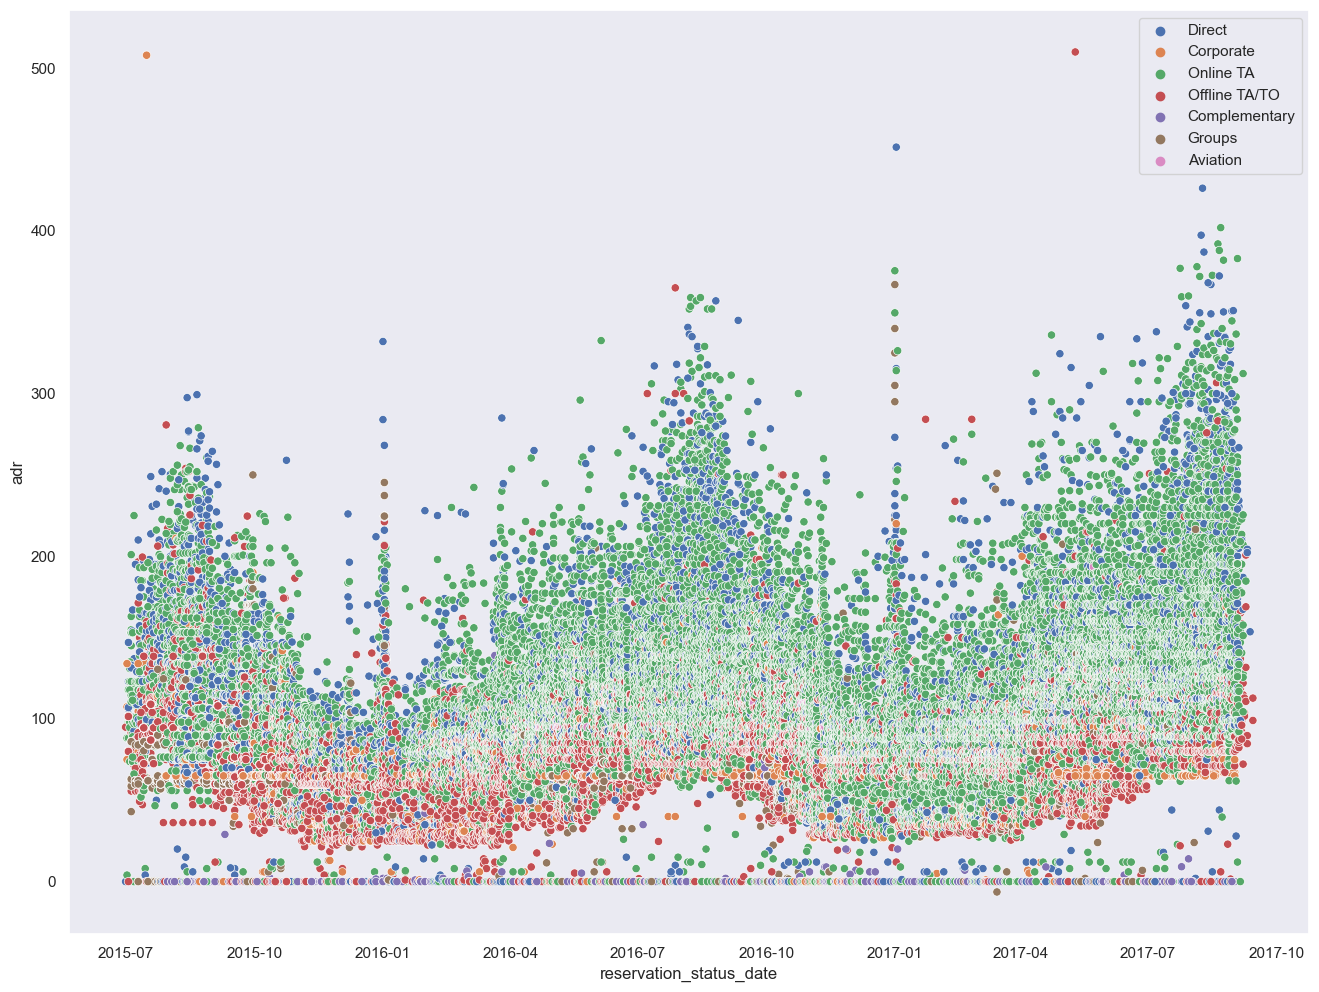

In [124]:
week_cnt = df1['stays_in_week_nights'].count()
week_cnt
cnt = df1['adr'].count()
#print(cnt,week_cnt)

sn.set_theme(style="dark")
f, ax = plt.subplots(figsize=(16, 12))
sn.scatterplot(data=df1, x=df1['reservation_status_date'], y='adr', markers='hotel',hue="market_segment")
plt.legend(loc='upper right')


### The average daily rate of the room is generally higher for the rooms that are booked directly by customers or via Online Tour Operators. Except for few outliers, hotel rooms booked by Corporates,Groups,Offline TA/TO get less price. While majority of Aviation and complimentary ones enjoy free ride.

### The below illustration captures 5 feature measures at the same time - Hotel , Total Nights, Total Guests, Market Segment and Meal. This becomes very cumbersome and confusing to visualize. 

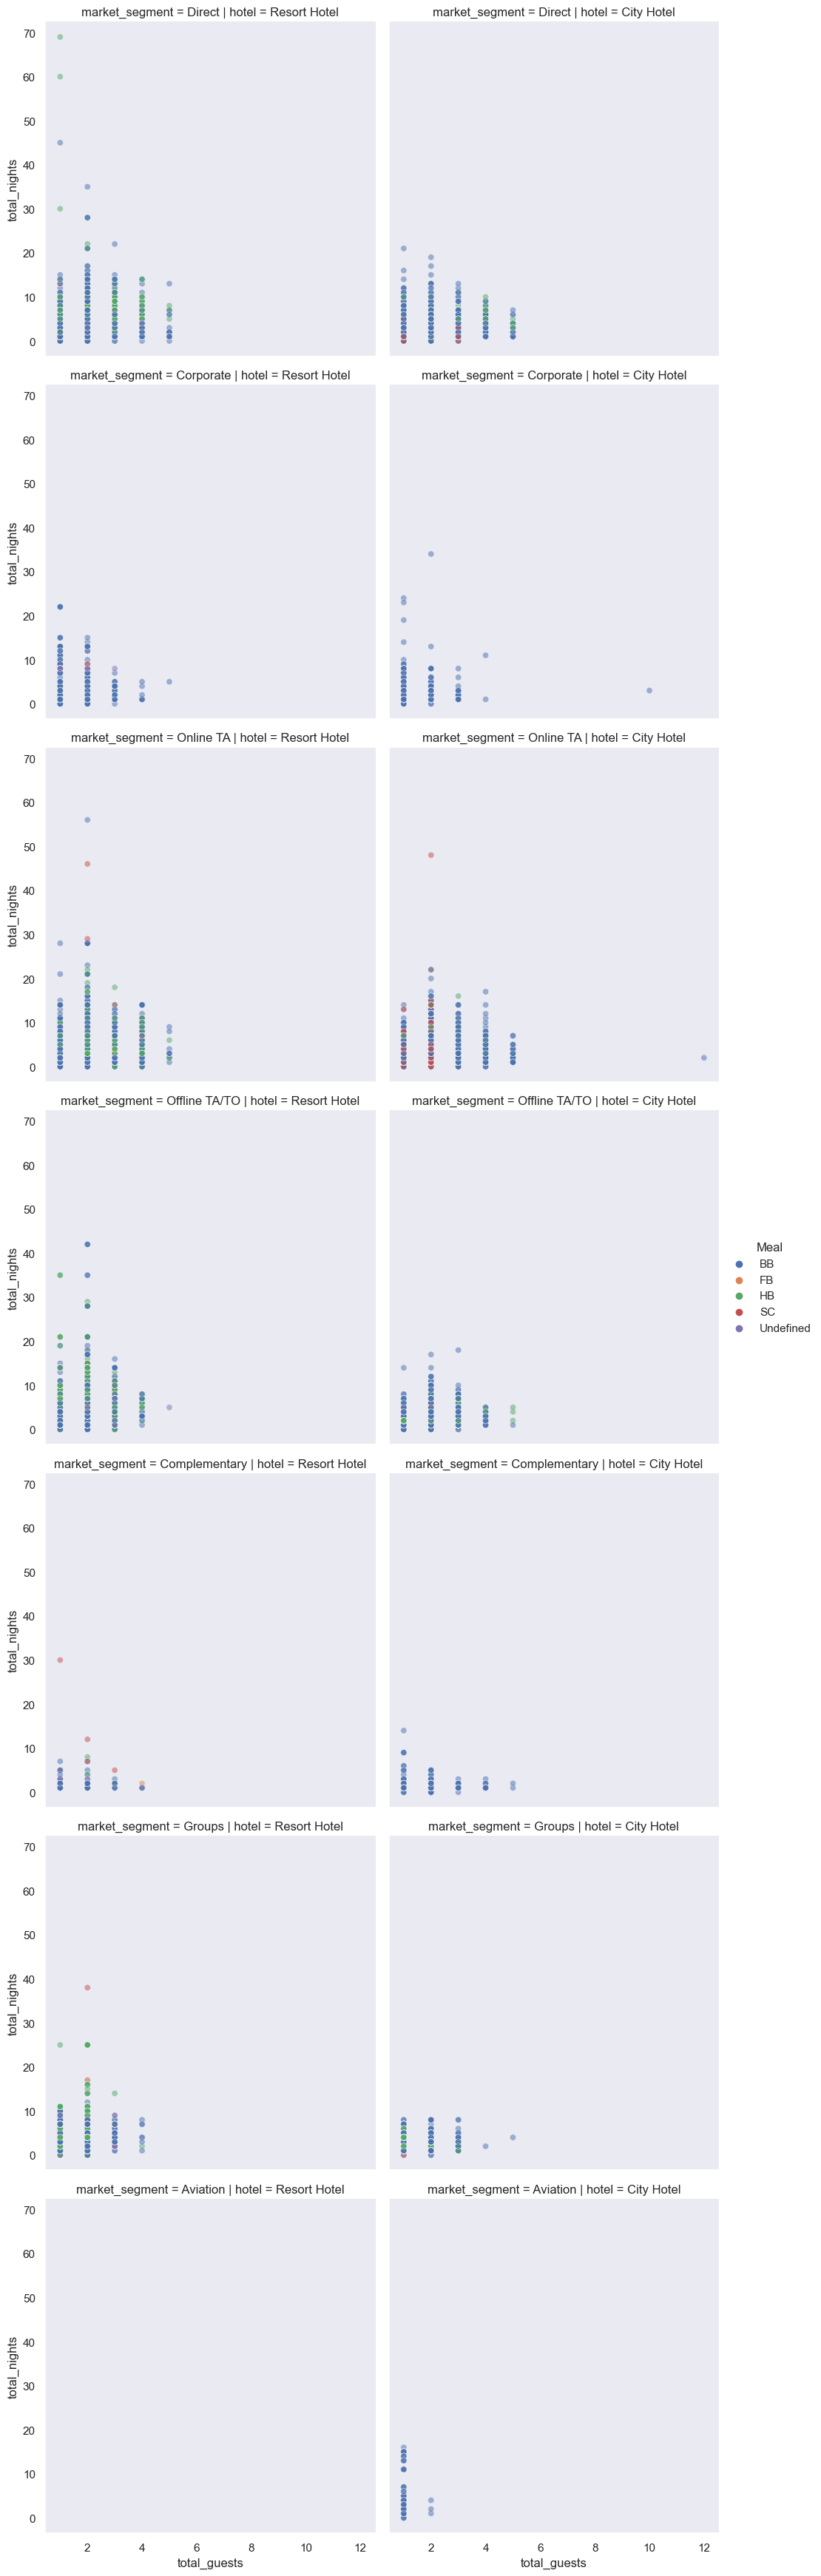

In [125]:
guests = df1.loc[(df1['total_guests'] != 0)]
g = sn.FacetGrid(guests, col="hotel",row="market_segment", height=5);
g.map(sn.scatterplot, "total_guests", "total_nights",hue=df["meal"], alpha=.5);
g.add_legend(title = 'Meal');


### We can choose features in  such a way to give insight in a precise manner.

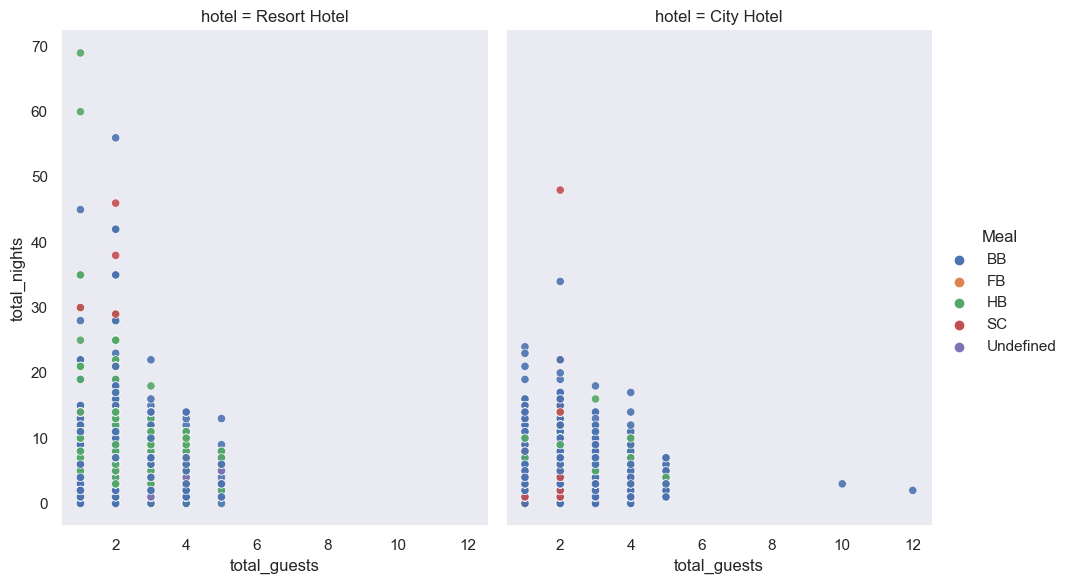

In [126]:
guests = df1.loc[(df1['total_guests'] != 0)]
g = sn.FacetGrid(guests, col="hotel", height=6,aspect=0.8);
g.map(sn.scatterplot, "total_guests", "total_nights",hue=df["meal"], alpha=.9);
g.add_legend(title = 'Meal');


### Maximum number of guests in resort 1 and 2 paying average daily rate of the room way more than the city hotel with guest number equal to 1 and 2.
### Resort has majority of people opting for half board meal option(breakfast and 1 meal). 
### City Hotel has majority people opting for bed and breakfast option.
### There are few no meal and full board option takers in Resort and City Hotel but these guests are just 1 or two in number.
### More than 2 guests always opt for either BB(bed and breakfast) or HB(half Board - Breakfast + 1 meal)


## Q.2.) CHAPTER 3 Concepts

### To show points on cartesian plane 

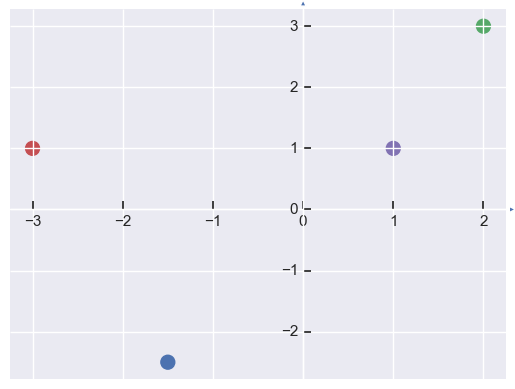

In [127]:
x = [1,2,-3,-1.5]
y = [1,3,1,-2.5]
color=['m','g','r','b']


if 1:
    fig = plt.figure(1)
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)

    for direction in ["xzero", "yzero"]:
        ax.axis[direction].set_axisline_style("-|>")
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        ax.axis[direction].set_visible(False)

scatter(x,y, s=100 ,marker='o', c=color)
grid(True)


show()


In [128]:
#Load the data
df = pd.read_csv("city_temperature.csv")
df.head()
df.tail()


,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


In [129]:
df_month = df.groupby(['Month'])['AvgTemperature'].agg([np.mean])

df_month


,mean
Month,
1,40.592510
2,43.331273
3,49.090085
4,55.787901
5,62.122887
6,67.130688
7,71.099519
8,70.077272
9,65.169275


### To show difference between charts using different aspect values and all other values remaining same

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


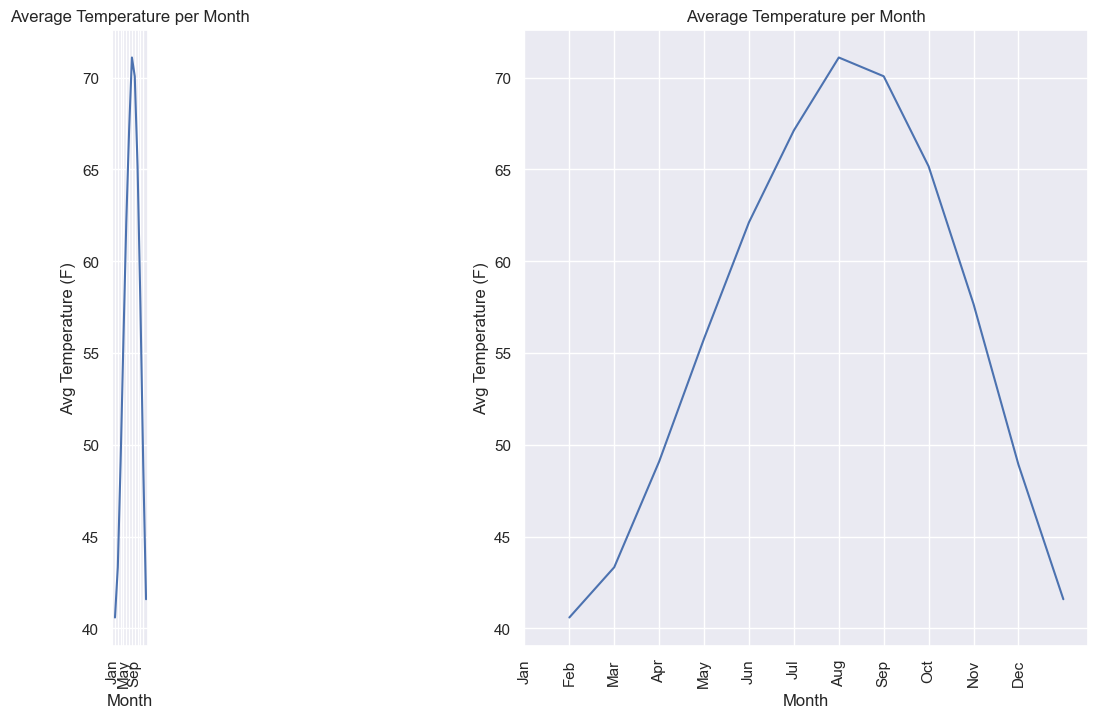

In [130]:
j=1
month = []
for i in range(len(df_month)):
    month_abbr = calendar.month_abbr[j]
    month.append(month_abbr)
    j +=1 

print(month)

f,ax=plt.subplots(ncols=2,figsize=(16, 8))
ax[0].plot(df_month.index,df_month['mean'])
ax[0].set_xticks(range(len(month)))
ax[0].set_xticklabels(month,rotation=90)
ax[1].plot(df_month.index,df_month['mean'])
ax[1].set_xticks(range(len(month)))
ax[1].set_xticklabels(month,rotation=90)
n = 4  # Keeps every 4th label
[l.set_visible(False) for (i,l) in enumerate(ax[0].xaxis.get_ticklabels()) if i % n != 0]

ax[0].set_xlabel("Month")
ax[0].set_ylabel('Avg Temperature (F)')
ax[0].set_title('Average Temperature per Month')
ax[0].set_aspect(4.5)
ax[0].grid(True)
ax[1].set_xlabel("Month")
ax[1].set_ylabel('Avg Temperature (F)')
ax[1].set_title('Average Temperature per Month')
ax[0].set_aspect(6.5)
ax[1].grid(True)

plt.show()


### July to August witness the peak of temperature in these summer months

### To show that different units that are linear does not change shape of the chart. Here we use Fahrenhiet and Celcius to show this

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


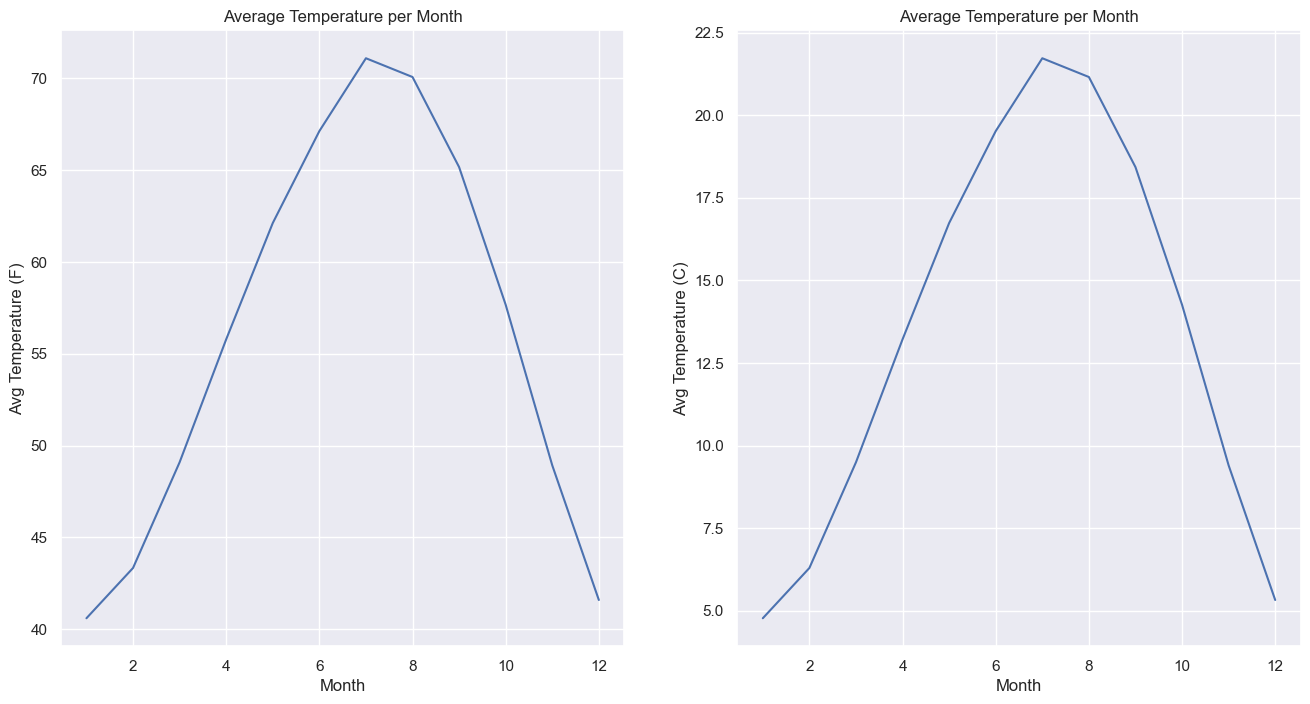

In [131]:
j=1
month = []
for i in range(len(df_month)):
    month_abbr = calendar.month_abbr[j]
    month.append(month_abbr)
    j +=1 

print(month)
# Convert Fahrenhiet to Celcius
celsius_2 = (df_month['mean'] - 32) * 5/9

f,ax=plt.subplots(ncols=2,figsize=(16, 8))
ax[0].plot(df_month.index,df_month['mean'])
ax[1].plot(df_month.index,celsius_2)

ax[0].set_xlabel("Month")
ax[0].set_ylabel('Avg Temperature (F)')
ax[0].set_title('Average Temperature per Month')
ax[0].grid(True)

ax[1].set_xlabel("Month")
ax[1].set_ylabel('Avg Temperature (C)')
ax[1].set_title('Average Temperature per Month')
ax[1].grid(True)

plt.show()

### Graph similar to the one in text book comparing the temperatures of Bombay and Calcutta across months.

64.98


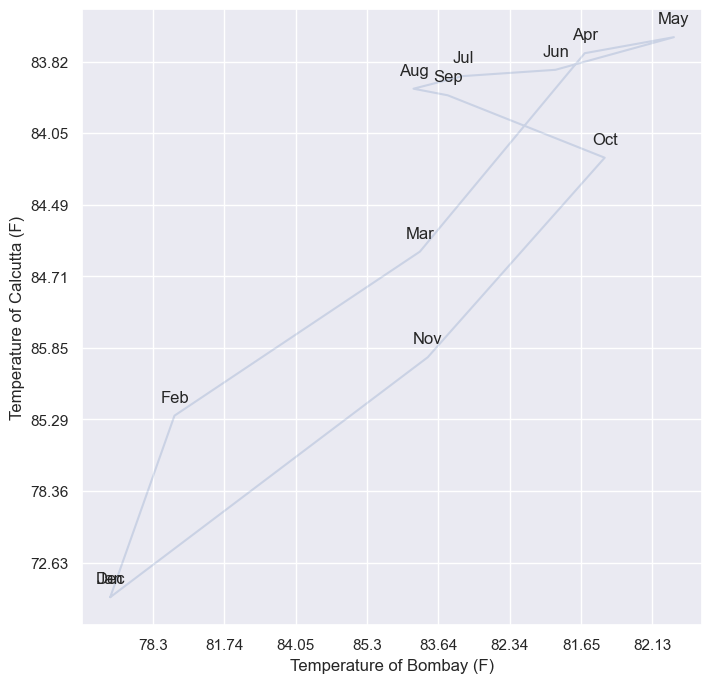

In [132]:
df_temp = df.groupby(['City','Month'])['AvgTemperature'].agg([np.mean]).reset_index()

df_temp['mean'] = round(df_temp['mean'],2)

bombay = df_temp.loc[df_temp['City'] == 'Bombay (Mumbai)']
#print('bombay',bombay)
calcutta = df_temp.loc[df_temp['City'] == 'Calcutta']
#print('calcutta',calcutta)

month_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

angles=np.linspace(0,2*np.pi,len(bombay['Month']), endpoint=False)
#print(angles)
angles = np.around(angles,2)

angles=np.concatenate((angles,[angles[0]]))
#print(angles)

print(calcutta['mean'].values[0])
calcutta['mean'].values[0] = calcutta['mean'].values[11]
bombay['mean'].values[0] = bombay['mean'].values[11]

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot()
ax.plot(bombay['mean'],calcutta['mean'],alpha=0.2)
ax.set_xticklabels(bombay['mean'])
ax.set_xlabel("Temperature of Bombay (F)")
ax.set_yticklabels(calcutta['mean'])
ax.set_ylabel("Temperature of Calcutta (F)")
ax.grid(True, which='both', axis='both')

for x,y,m in zip(bombay['mean'],calcutta['mean'],month_label):

    label = "{:.2f}".format(y)

    plt.annotate(m, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

In [133]:
df_pop = pd.read_csv("World_Population.csv")

In [134]:
df_pop.head()

,Country Name,Year,Population
0,Aruba,1960,"54,208"
1,Andorra,1960,"13,414"
2,Afghanistan,1960,"8,994,793"
3,Angola,1960,"5,270,844"
4,Albania,1960,"1,608,800"


In [135]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11984 entries, 0 to 11983
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  11984 non-null  object
 1   Year          11984 non-null  int64 
 2   Population    11879 non-null  object
dtypes: int64(1), object(2)
memory usage: 281.0+ KB


In [136]:
df_pop.isna().sum()

Country Name      0
Year              0
Population      105
dtype: int64

In [137]:
df_pop.dropna()

,Country Name,Year,Population
0,Aruba,1960,"54,208"
1,Andorra,1960,"13,414"
2,Afghanistan,1960,"8,994,793"
3,Angola,1960,"5,270,844"
4,Albania,1960,"1,608,800"
...,...,...,...
11979,"Yemen, Rep.",2015,"26,832,000"
11980,South Africa,2015,"54,767,000"
11981,"Congo, Dem. Rep.",2015,"77,267,000"
11982,Zambia,2015,"16,212,000"


In [138]:
# Population contained NaN
df_pop = df_pop[~df_pop['Population'].isnull()]

df_pop.Population = df_pop.Population.replace(',','', regex=True)
df_pop


,Country Name,Year,Population
0,Aruba,1960,54208
1,Andorra,1960,13414
2,Afghanistan,1960,8994793
3,Angola,1960,5270844
4,Albania,1960,1608800
...,...,...,...
11979,"Yemen, Rep.",2015,26832000
11980,South Africa,2015,54767000
11981,"Congo, Dem. Rep.",2015,77267000
11982,Zambia,2015,16212000


In [139]:
df_pop.Population.astype(float)

pop_2015 = df_pop[df_pop['Year']== 2015]
pop_2015

pop_2015.isna().sum()


Country Name    0
Year            0
Population      0
dtype: int64

### Calculate mean of the population and ratio of population over mean and plot on the LOGARITHMIC Scale

In [140]:
pop_2015_min = np.asarray(pop_2015['Population'], dtype=np.float).min()
pop_2015_max = np.asarray(pop_2015['Population'], dtype=np.float).max()
pop_2015_m = round(np.asarray(pop_2015['Population'], dtype=np.float).mean(),4)

print("Min , Max, Mean :", pop_2015_min,pop_2015_max,pop_2015_m)

Min , Max, Mean : 10000.0 1370840000.0 34855704.7619


In [141]:
pop_2015_r = np.around(np.asarray(pop_2015.iloc[:,2], dtype=np.float)/pop_2015_m,4)
print(pop_2015_r)


[3.00000e-03 2.00000e-03 9.33200e-01 7.17900e-01 8.32000e-02 2.62700e-01
 1.24560e+00 8.66000e-02 1.60000e-03 2.60000e-03 6.82900e-01 2.45900e-01
 2.76900e-01 3.20700e-01 3.24200e-01 3.12100e-01 5.19500e-01 4.61890e+00
 2.05700e-01 3.95000e-02 1.11000e-02 1.09300e-01 2.71100e-01 1.03000e-02
 3.07700e-01 5.96310e+00 8.10000e-03 1.21000e-02 2.22000e-02 6.49000e-02
 1.40600e-01 1.02950e+00 2.37100e-01 4.70000e-03 5.14900e-01 3.93290e+01
 6.51300e-01 6.69700e-01 1.32500e-01 1.38370e+00 2.26000e-02 1.49000e-02
 1.37900e-01 3.26800e-01 4.50000e-03 1.70000e-03 3.34000e-02 3.02200e-01
 2.32190e+00 2.55000e-02 2.10000e-03 1.62400e-01 3.02000e-01 1.13800e+00
 4.63200e-01 2.62530e+00 1.50000e-01 1.33290e+00 3.76000e-02 2.85150e+00
 1.57200e-01 2.56000e-02 1.90720e+00 1.40000e-03 3.00000e-03 4.95000e-02
 1.86350e+00 1.06600e-01 7.86400e-01 3.61700e-01 5.71000e-02 5.29000e-02
 2.42000e-02 3.11000e-01 3.10000e-03 4.68900e-01 4.90000e-03 2.20000e-02
 2.09300e-01 2.31700e-01 1.21200e-01 3.07300e-01 2.

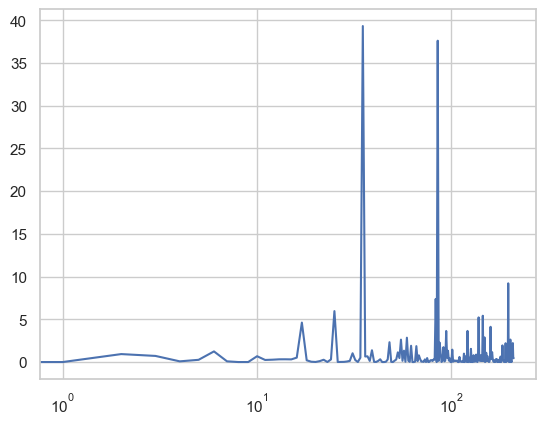

In [142]:
sn.set_style('whitegrid')

g_results=sn.lineplot(data=pop_2015_r)
g_results.set(xscale='log');


### Without LOGARITHMIC scale

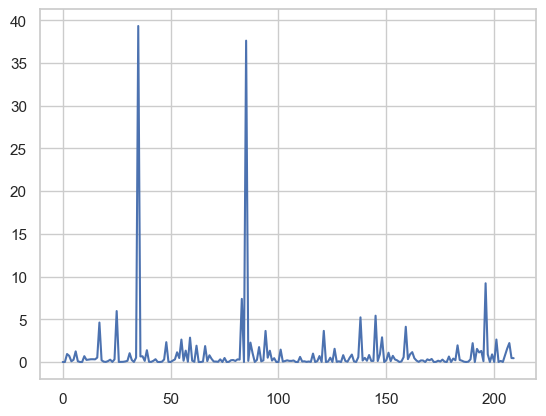

In [143]:
sn.set_style('whitegrid')

g_results=sn.lineplot(data=pop_2015_r)
g_results.set();

### Bar plot showing population in default scale.

Text(0, 0.5, 'Population (billion)')

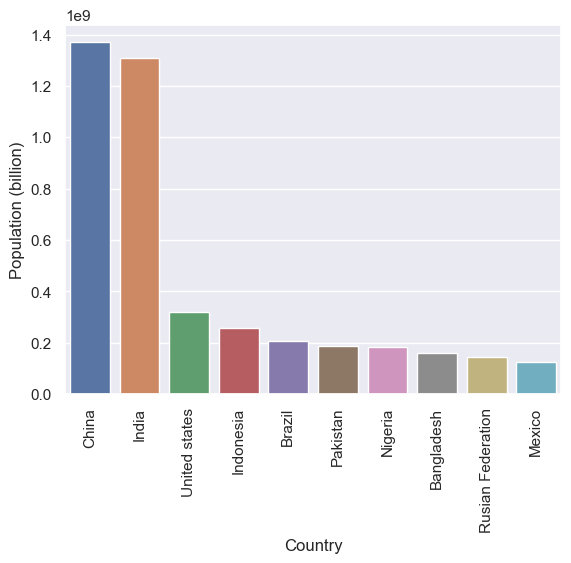

In [144]:
top_10 = np.sort(np.asarray(pop_2015.iloc[:,2], dtype=np.float))[::-1][:10]
top_10

sn.set_style('darkgrid')

labels = ['China','India','United states','Indonesia','Brazil','Pakistan','Nigeria','Bangladesh','Rusian Federation','Mexico']
top_10 = np.sort(np.asarray(pop_2015.iloc[:,2], dtype=np.float))[::-1][:10]
ax = sn.barplot(x = labels, y= top_10)
ax.set_xticklabels(labels=labels,rotation=90);
ax.set_xlabel("Country")
ax.set_ylabel("Population (billion)")

### Top 10 populated countries using square-root-transformed data

Text(0.5, 0, 'Population (Sqrt)')

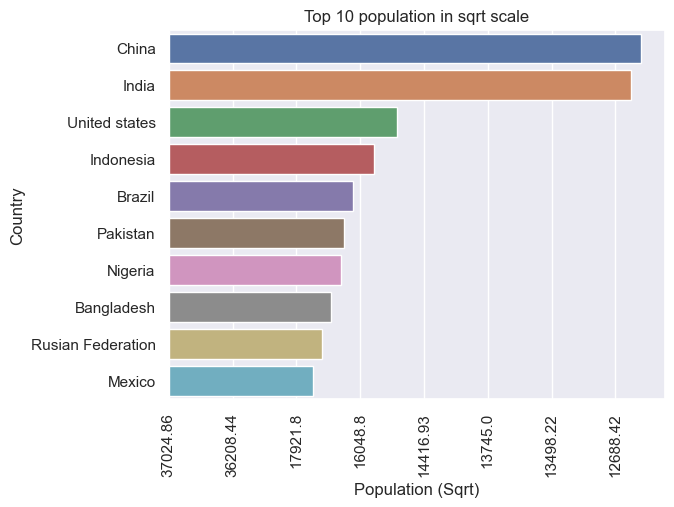

In [145]:
sn.set_style('darkgrid')
Nx =85
labels = ['China','India','United states','Indonesia','Brazil','Pakistan','Nigeria','Bangladesh','Rusian Federation','Mexico']
top_10 = np.sort(np.asarray(pop_2015.iloc[:,2], dtype=np.float))[::-1][:10]
top_10 = np.around(np.sqrt(top_10),2)
ax = sn.barplot(x = top_10, y= labels)
ax.set_title('Top 10 population in sqrt scale')
ax.set_xticklabels(top_10,rotation=90);
ax.set_ylabel("Country")
ax.set_xlabel("Population (Sqrt)")

### Showing Temperature of different cities using radar chart

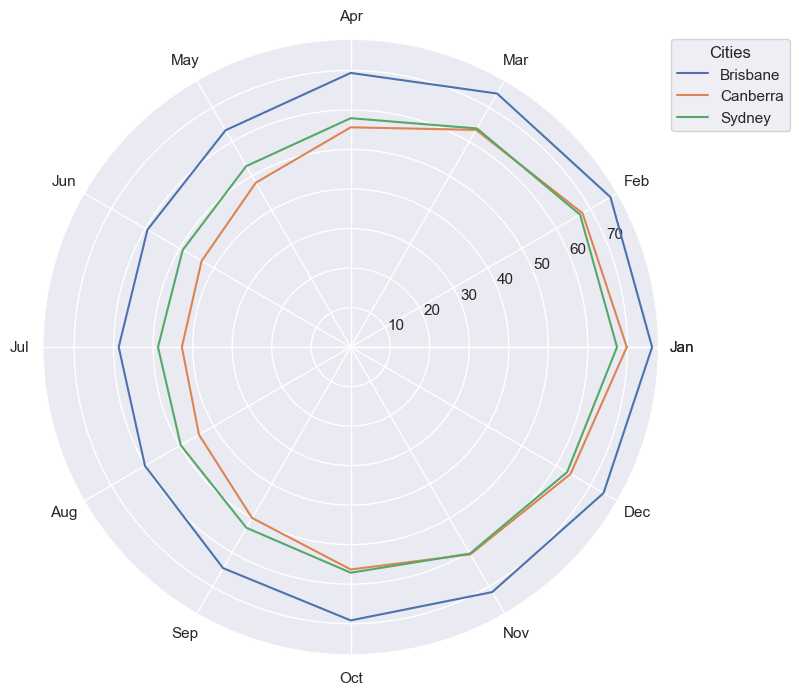

In [146]:
df_temp = df.groupby(['City','Month'])['AvgTemperature'].agg([np.mean]).reset_index()

df_temp['mean'] = round(df_temp['mean'],2)
df_temp

Canberra = df_temp.loc[df_temp['City'] == 'Canberra']
#print('Canberra',Canberra)
Sydney = df_temp.loc[df_temp['City'] == 'Sydney']
#print('Sydney',Sydney)
Brisbane = df_temp.loc[df_temp['City'] == 'Brisbane']
#print('Brisbane',Brisbane)
    
month_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

angles=np.linspace(0,2*np.pi,len(month_label), endpoint=False)

angles=np.concatenate((angles,[angles[0]]))

#print(Brisbane.values[0])

Brisbane.loc[len(Brisbane.index)] = [Brisbane['City'].values[0], Brisbane['Month'].values[0], Brisbane['mean'].values[0]]
Brisbane.rename(index={12:Brisbane.index[0]+1}, inplace=True)

Canberra.loc[len(Canberra.index)] = [Canberra['City'].values[0], Canberra['Month'].values[0], Canberra['mean'].values[0]]
Canberra.rename(index={12:Canberra.index[0]+1}, inplace=True)

Sydney.loc[len(Sydney.index)] = [Sydney['City'].values[0], Sydney['Month'].values[0], Sydney['mean'].values[0]]
Sydney.rename(index={12:Sydney.index[0]+1}, inplace=True)

#print(Brisbane,Canberra,Sydney)

month_label.append('Jan')
#print(month_label)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(polar=True)
ax.plot(angles,Brisbane['mean'].values,label='Brisbane')
ax.plot(angles,Canberra['mean'].values,label='Canberra')
ax.plot(angles,Sydney['mean'].values,label='Sydney')
ax.set_thetagrids(angles*180/np.pi,month_label)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,title='Cities')


plt.show()


### Used the following link to use another environment for installing Basemap and geopandas
### Used: pip3 install Basemap on new environment 
### https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

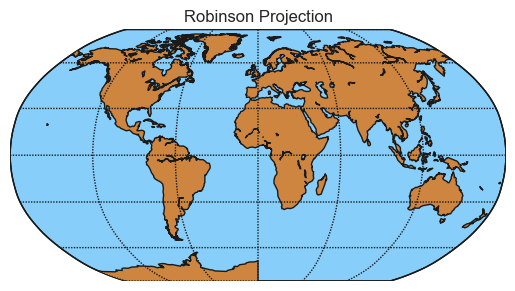

In [147]:
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='peru',lake_color='lightskyblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawmapboundary(fill_color='lightskyblue')
plt.title("Robinson Projection")
plt.show()



# Q3.) Chapter 4 Concepts are shown through Tableau file : DataVisualization_HW2_Q3.twb

### [chart to show different groups, chart to show groups with no intrinsic order, chart to show color as data value,chart to show sequential color scheme, chart to show diverging color scheme,chart to highlight a specific data value, chart to highlight a group of data]

# Q4.) Most of the Chapter 5 Concepts are shown through tableau file : DataVisualization_Q4_HW2.twb 

### [Bars(V and H),Dots,Grouped Bars,Stacked Bars,Heatmap,Cumulative Density,Boxplots,Strip Charts,Ridgeline Plot,Pie chart,Multiple Pie charts,Stacked Density,Treemap,Mosaic Plot,Paired Scatterplot,Slopegraph,Correlelogram,Connected Scatterplot,Choropleth,Map]

#  Rest of the plots are shown below

## Q4.) Chapter 5 few plots

### Hex bins plot to show mean temperature across 12 months. [X-Y relationships]

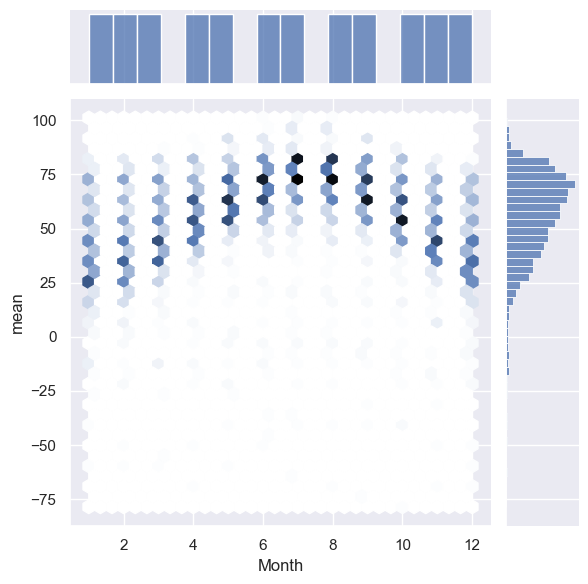

In [148]:
sn.jointplot(x = 'Month',y = 'mean',data = df_temp,kind = 'hex')
plt.show()

### Density Contour Maps. [X-Y Relationships]

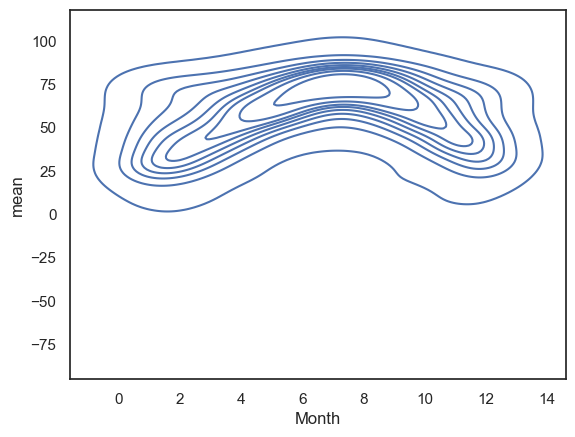

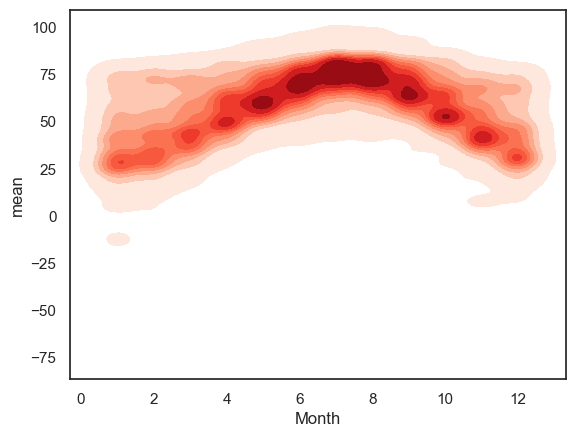

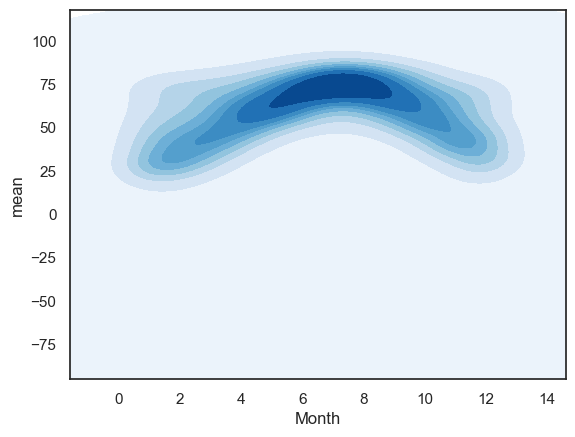

In [149]:
# set seaborn style
sn.set_style("white")

# Basic 2D density plot
sn.kdeplot(data=df_temp,x='Month', y='mean')
plt.show()
 
# Custom the color, add shade and bandwidth
sn.kdeplot(data=df_temp,x='Month', y='mean', cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

# Add thresh parameter
sn.kdeplot(data=df_temp,x='Month', y='mean', cmap="Blues", shade=True, thresh=0)
plt.show()

#### June to August Month are showing more density as mean Temperatures are high in those months

### Regression Plot to show relation between stays in week nights and average daily room rate.By default errorbar="ci" draws a 95% confidence interval. [ Uncertainity.]

<AxesSubplot:xlabel='stays_in_week_nights', ylabel='adr'>

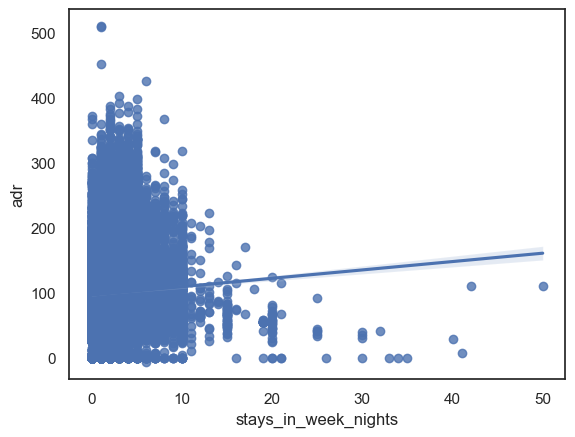

In [150]:
sn.regplot(x=df1.stays_in_week_nights, y=df1.adr)

### People who stayed for longer than 15 week nights tend to get the room on lesser average daily rate.

### Error Bars to show range to likely values of average daily room rate using mean estimation with confidence level of 85%.[Uncertainity]

<ErrorbarContainer object of 3 artists>

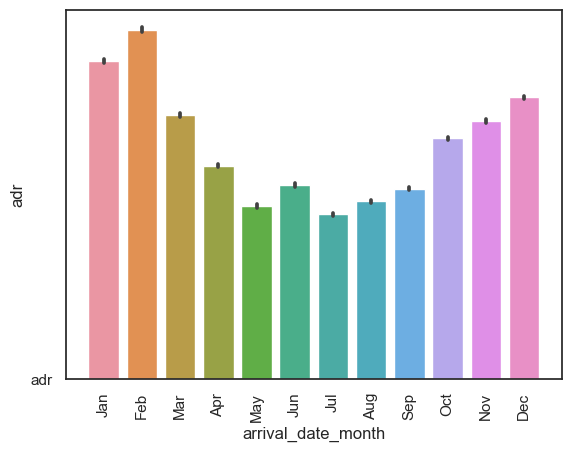

In [151]:
month_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
g = sn.barplot(x="arrival_date_month", y="adr", ci=85, data=df1)
g.set_xticklabels(labels=month_label,rotation=90)
g.errorbar(x="arrival_date_month", y="adr",capthick=.5)


### Quantile Quantile Plot(qqplot) to show whether the distribution of data is similar or not. 45 is the angle at which the line extends.Data points lying on this line indicates that their distribution is similar.

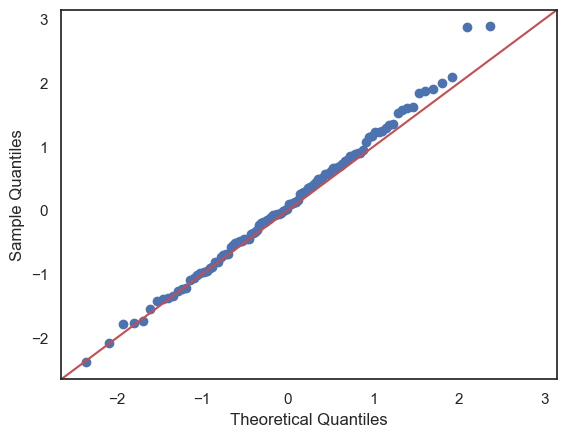

In [156]:
data_points = np.random.normal(0, 1, 110)    
  
sm.qqplot(data_points, line ='45')
py.show()

# Quantile Dot Plot. 

#### The below code is taken from the link below to understand the Quantile Dot Plot.

#### https://github.com/ColCarroll/quantile_dotplot

#### These plots turn continuous distributions into discrete events, turning percentile calculations into counting. For example, with this chart, we can quickly tell that 10% of the time, the food will be here in less than 8 minutes, and 30% of the time, in less than 10.


In [158]:
__all__ = ["compute_ntiles", "ntile_dotplot"]


def compute_ntiles(data: np.ndarray, *, dots, hist_bins):
    """Compute an ntile partition for the data.
    Parameters:
    -----------
    data : iterable
        Empirical data from a distribution.
    dots : int
        Number of dots in the quantile dot plot.
    hist_bins : int or str
        If an integer, the number of histogram bins to put the dots in. If 'auto',
        will choose the number of bins so that the tallest bin is about as high as
        the number of bins.
    Returns:
    --------
    ndarray, ndarray:
        the centers of the quantiles (x-values)
        the number of dots in each of these bins
    """
    data = np.array(data)
    edge = (100 / dots) / 2
    grouped = np.percentile(
        data.ravel(), np.linspace(edge, 100 - edge, num=dots, endpoint=True)
    )
    if hist_bins == "auto":
        bins = 1
        counts, centers = np.histogram(grouped, bins=bins)
        while counts.max() + 2 > len(counts):
            bins += 1
            counts, centers = np.histogram(grouped, bins=bins)
    else:
        counts, centers = np.histogram(grouped, bins=hist_bins)
    bin_width = centers[1] - centers[0]
    centers = centers[:-1] + 0.5 * bin_width
    return centers, counts


def ntile_dotplot(data, dots=10, hist_bins="auto", **kwargs):
    """Make an ntile dotplot out of the data.
    Parameters:
    -----------
    data : iterable
        Empirical data from a distribution.
    dots : int
        Number of dots in the quantile dot plot.
    hist_bins : int or str
        If an integer, the number of histogram bins to put the dots in. If 'auto',
        will choose the number of bins so that the tallest bin is about as high as
        the number of bins.
    ax : matplotlib.Axes (Optional)
        Axis to plot on. If not provided, attempts to plot on current axes.
    kwargs :
        Passed to the PatchCollection artist.
    Returns:
    --------
    PatchCollection :
        The collection of artists added to the axes.
    """
    centers_, counts = compute_ntiles(data, dots=dots, hist_bins=hist_bins)
    centers = np.repeat(centers_, counts)
    counts = np.concatenate([np.arange(0.5, j + 0.5) for j in counts])

    axis = kwargs.pop("ax", None)
    if axis is None:
        axis = plt.gca()
    axis.figure.set_dpi(72.0)
    ec = kwargs.pop("ec", "black")
    kwargs.setdefault("edgecolor", ec)
    lw = kwargs.pop("lw", 1)
    kwargs.setdefault("linewidth", lw)

    circs = axis.scatter(centers, counts, s=1, **kwargs)
    axis.yaxis.set_major_locator(MaxNLocator(integer=True))

    if len(centers_) <= len(axis.get_xticks()):
        axis.set_xticks(centers_)
    bin_width = centers_[1] - centers_[0]
    axis.set_xlim(centers_[0] - bin_width, centers_[-1] + bin_width)

    axis.set_ylim(0, counts.max() + 1)
    diff = axis.transData.transform([(0, 1), (bin_width, 0), (0, 0)])
    x_scale = max(diff[0] - diff[-1])
    y_scale = max(diff[1] - diff[-1])
    if x_scale > y_scale:
        axis.set_ylim(0, (x_scale / y_scale) * (counts.max() + 1))
        diff = axis.transData.transform([(0, 1), (bin_width, 0), (0, 0)])

    size = max(diff[0] - diff[-1])
    circs.set_sizes([size ** 2 for _ in centers])
    return axis

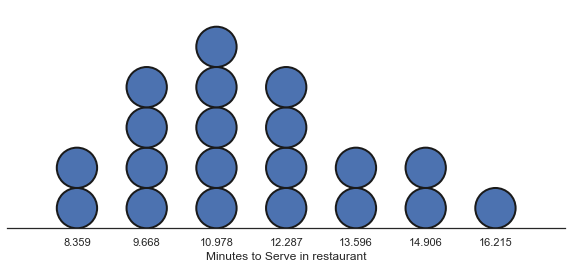

In [160]:
fig, ax = plt.subplots(figsize=(10, 4))
data = np.random.lognormal(mean=np.log(11.4), sigma=0.2, size=1_000_000)

ax = ntile_dotplot(data, dots=20, edgecolor="k", linewidth=2, ax=ax)

ax.set_xlabel("Minutes to Serve in restaurant")
for spine in ("left", "right", "top"):
    ax.spines[spine].set_visible(False)
ax.yaxis.set_visible(False)